# Results Analysis - Jamming and NNs

In [3]:
import os
import os.path
from experiment import Experiment
import matplotlib.pyplot as plt
import numpy as np
from alice import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ls

alice.py             log_ov_6.out           recNet_ovL04P524288r1.0/
before_1112meeting/  log_ov_MASTERdata.out  recNet_ovL04P524288r2.0/
before_1212meeting/  log_P_2.out            recNet_ovL07P16384r0.1/
classes.py           log_P_3.out            recNet_ovL07P16384r0.5/
experiment.py        log_P.out              recNet_ovL07P16384r1.0/
figures/             main_generror.py       recNet_ovL07P16384r1.5/
log_ov_1.out         mainP.py               recNet_ovL07P16384r2.0/
log_ov_2.out         main_triangularNet.py  recNet_ovL07P16384r2.6/
log_ov_3.out         old_/                  recNet_ovL07P16384r3.1/
log_ov_4.out         __pycache__/           results_analysis.ipynb
log_ov_5.out         README.md              train.py


In [5]:
def name2param(name):
    """
    Convert directory name to experiment parameters.
    Returns parameters in a tuple:
        - Network type: triangular or rectangular;
        - Data type: SAT or at jamming;
        - L: number of layers for rectangular nets
        - P: number of samples
        - r_min = P / N_max determines the maximum size (N_max) of the models employed.
            If datatype == 'ov' this r also defines the point in the SAT phase we are working at;
            if datatype == 'rc', N_max is reduced - i.e. the network size is reduced -
                until we reach N* jamming point.
    """
    idx = name.index('N')
    networktype = name[:3]
    name = name[(idx+4):]
    print(name)
    datatype = name[:2]
    L = int(name[3:5])
    P = int(name[6:11])
    r_min = float(name[12:])
    print((networktype, datatype, L, P, r_min))
    return (networktype, datatype, L, P, r_min)

def verbose(params, only_r=False, lp=False):
    if only_r:
        return f'r = {params[4]}'
    if lp:
        return f'L = {params[2]}, P = {params[3]}'
    if params[1] == 'ov':
        return f'L = {params[2]}, P = {params[3]}, r = {params[4]}'
    else:
        return f'L = {params[2]}, P = {params[3]}'

def find_idx_rc(result):
    """Find index of last point in the SAT phase given result dictionary
    for a certain layer."""
    try:
        return np.argwhere(np.asarray(result['N_delta']) < 30)[-1][0]
    except IndexError:
        print('No transition found, smaller N_delta = {}'.format(result['N_delta'][0]))
        return 0

Read directories names and define experiments' parameters

In [6]:
file_list = next(os.walk('.'))
print(file_list[1])
experiments_names = [name2param(s) for s in file_list[1] if len(s) == 22]

['recNet_ovL07P16384r1.5', 'recNet_ovL04P524288r1.0', 'recNet_ovL07P16384r2.6', 'before_1212meeting', 'recNet_ovL07P16384r3.1', 'before_1112meeting', 'figures', 'old_', 'recNet_ovL04P524288r2.0', '__pycache__', '.ipynb_checkpoints', 'recNet_ovL07P16384r0.1', 'recNet_ovL07P16384r2.0', 'recNet_ovL07P16384r1.0', 'recNet_ovL07P16384r0.5']
ovL07P16384r1.5
('rec', 'ov', 7, 16384, 1.5)
ovL07P16384r2.6
('rec', 'ov', 7, 16384, 2.6)
ovL07P16384r3.1
('rec', 'ov', 7, 16384, 3.1)
ovL07P16384r0.1
('rec', 'ov', 7, 16384, 0.1)
ovL07P16384r2.0
('rec', 'ov', 7, 16384, 2.0)
ovL07P16384r1.0
('rec', 'ov', 7, 16384, 1.0)
ovL07P16384r0.5
('rec', 'ov', 7, 16384, 0.5)


Comments: it could be that there are two things that are important, this would explain the maximum in the first plots. 

e.g. magnitude of activations make datasets harder (even if we ~ proved it wrong) but then, as they approach the last layer, they become linearly separable evenif magnitudes are large.

TODO:
- Prove gen error is independent on r if SAT phase
- Study the dataset extracted in UNSAT phase

Stange stuff:
- N_new / N* is larger than 1 for data at jamming
- N_new / N* has a maximum for intermediate layers (see above). If this depends on sparsity we try with linear nets

In [7]:
for data in [('rec', 'ov', 7, 16384, 0.1)]:    
    print('\n')
    parameters = {'networktype':data[0],
                  'datatype':data[1],
                  'L':data[2],
                  'P':data[3],
                  'r_min':data[4],
                  'new_data':False
                  }
   
    experiment = Experiment(**parameters)
    
    try:
        experiment.load()
    except FileNotFoundError:
        continue
    
    results = experiment.results.results
    
    residual_net_size_at_jamming = results['D0']['residual_net_size_at_jamming']
    N_tot = results['D0']['residual_net_size_at_jamming'][0]



Directory  recNet_ovL07P16384r0.1/figures/loss  already exists
Directory  recNet_ovL07P16384r0.1/models  already exists
Directory  recNet_ovL07P16384r0.1/data  already exists


In [8]:
r_to_model = {'0.1': 162945, '0.5': 32913, '1.0': 16513, '1.5': 10960, '2.0': 8365, '2.6': 6120, '3.0': 5320}



Directory  recNet_ovL07P16384r1.5/figures/loss  already exists
Directory  recNet_ovL07P16384r1.5/models  already exists
Directory  recNet_ovL07P16384r1.5/data  already exists
dict_keys(['D0', 'D1ge', 'D1', 'D2ge', 'D2', 'D3ge', 'D3', 'D4ge', 'D4', 'D5ge', 'D5', 'D6ge', 'D6', 'D7ge', 'D7'])


Directory  recNet_ovL07P16384r2.6/figures/loss  already exists
Directory  recNet_ovL07P16384r2.6/models  already exists
Directory  recNet_ovL07P16384r2.6/data  already exists
dict_keys(['D0', 'D1ge', 'D1', 'D2ge', 'D2', 'D3ge', 'D3', 'D4ge', 'D4', 'D5ge', 'D5', 'D6ge', 'D6', 'D7ge', 'D1oneh', 'D2oneh', 'D3oneh', 'D4oneh', 'D5oneh', 'D6oneh', 'D7oneh'])
No transition found for D4
No transition found for D5
No transition found for D6


Directory  recNet_ovL07P16384r3.1/figures/loss  already exists
Directory  recNet_ovL07P16384r3.1/models  already exists
Directory  recNet_ovL07P16384r3.1/data  already exists
dict_keys(['D0', 'D1ge', 'D1', 'D2ge', 'D2', 'D3ge', 'D3', 'D4ge', 'D4', 'D5ge', 'D5', 'D6ge

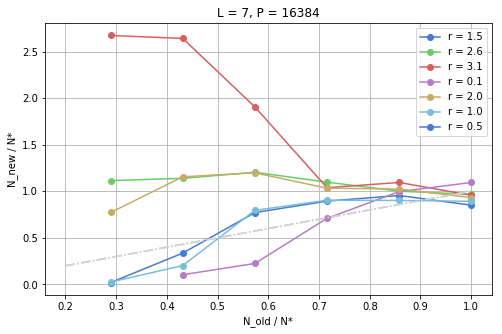

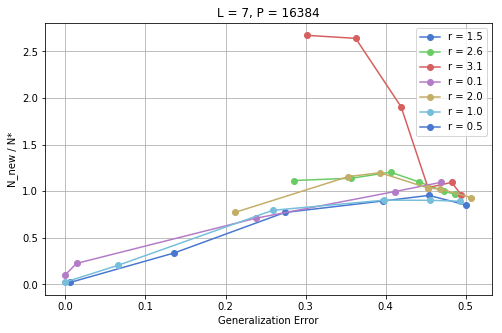

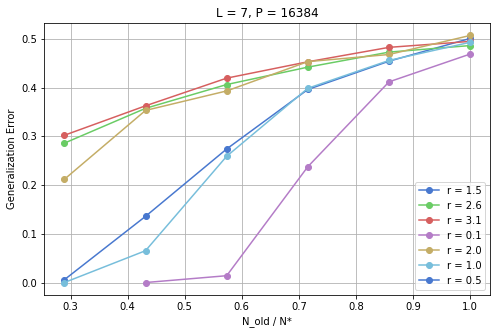

In [18]:
cdict1 = {'ov':'green', 'rc':'b'}
cdict2 = {'ov':'orange', 'rc':'red'}
my_labels = {'tri':'Triangular Net', 'rec':'Rectangular Net'}
my_labels = {'ov':'SAT phase', 'rc':'Jamming'}

for data in experiments_names:    
    print('\n')
    parameters = {'networktype':data[0],
                  'datatype':data[1],
                  'L':data[2],
                  'P':data[3],
                  'r_min':data[4],
                  'new_data':False
                  }
    
    try:
        experiment = Experiment(**parameters)
        experiment.load()
    except FileNotFoundError:
        continue

    results = experiment.results.results
    
    print(results.keys())
    
    if 0:
    
        results['D0']['residual_net_size_at_extraction'] = \
                    manual_count_params(load_model(r_to_model[str(data[4])], experiment.main_dir))
        
    else:
                results['D0']['residual_net_size_at_extraction'] = \
                    manual_count_params(load_model(r_to_model[str(2.6)], 'recNet_ovL07P16384r2.6'))
    
    NeNt, NnNt, ge = [], [], []
        
    for i,D in enumerate(results):
        if 'ge' in D:
            gen_error = results[D]['gen_error'][0]

        elif not 'ge' in D and D != 'D0' and results[D]['N'] and not 'one' in D and not data[4]==0.5 :#and not data[4]==3.1:
            
#             try:
#                 N_expected = results['D0']['residual_net_size_at_jamming'][int(D[1:])-1]
#                 N_tot = results['D0']['residual_net_size_at_jamming'][0]
#             except KeyError:
#                 continue

            N_expected = results['D0']['residual_net_size_at_extraction'][int(D[1:2])-1]
            N_tot = results['D0']['residual_net_size_at_extraction'][0]
    
            try:
                N_new = results[D]['N'][-3]
            except IndexError:
                print(f'No transition found for {D}')
                N_new = results[D]['N'][0]

            NeNt.append(N_expected/N_tot)
            NnNt.append(N_new/N_tot)
            ge.append(gen_error)
            
#             plt.figure('N_new__N_expected' + data[1])
#             plt.plot(N_expected/N_tot, N_new/N_tot, '-o', label=my_labels[data[1]], c=cdict1[data[1]])

#             plt.figure('gen_error' + data[1])
#             plt.plot(N_new/N_tot, gen_error, '-o', label=my_labels[data[1]], c=cdict2[data[1]])

#             plt.figure('gen_error_N_old' + data[1])
#             plt.plot(N_expected/N_tot, gen_error, '-o', label=my_labels[data[1]], c=cdict2[data[1]])

#             my_labels[data[1]] = '_nolegend_'
            
        
    plt.figure('N_new__N_expected' + data[1], figsize=(8,5))
    plt.plot(NeNt, NnNt, '-o', label = verbose(data, only_r=True))  #label=my_labels[data[1]], c=cdict1[data[1]])    
    plt.title(verbose(data, lp=True))
    plt.xlabel('N_old / N*')
    plt.ylabel('N_new / N*')
    plt.plot(np.linspace(0.2,1,10), np.linspace(0.2,1,10), '-.', c='lightgray', alpha=0.5)
    plt.grid(True)
    plt.savefig(f'figures/{data[1]}_N_new__N_old_2712_oneh.eps', format='eps')
    plt.legend()

#     plt.figure('gen_error' + data[1])
#     plt.plot(NnNt, ge, '-o', label = verbose(data)) #label=my_labels[data[1]], c=cdict2[data[1]])
#     plt.title(experiment.main_dir)
#     plt.ylabel('Generalization Error')
#     plt.xlabel('N_new / N*')
#     plt.grid(True)   
#     plt.legend()
#     plt.savefig(f'figures/{experiment.main_dir}_N_new__gen_error.png', format='png')

    plt.figure('gen_error_N_new' + data[1], figsize=(8,5))
    plt.plot(ge, NnNt, '-o',  label = verbose(data, only_r=True)) #label=my_labels[data[1]], c=cdict2[data[1]])
    plt.title(verbose(data, lp=True))
    plt.xlabel('Generalization Error')
    plt.ylabel('N_new / N*')
    plt.grid(True)  
    plt.savefig(f'figures/{data[1]}_N_new__gen_error_0501_3.1.png', format='png')

    plt.legend()
    
    plt.figure('gen_error_N_old' + data[1], figsize=(8,5))
    plt.plot(NeNt, ge, '-o',  label = verbose(data, only_r=True)) #label=my_labels[data[1]], c=cdict2[data[1]])
    plt.title(verbose(data, lp=True))
    plt.ylabel('Generalization Error')
    plt.xlabel('N_old / N*')
    plt.grid(True)  
    plt.savefig(f'figures/{data[1]}_N_old__gen_error_2712_oneh.eps', format='eps')

    plt.legend()
    #plt.show()